<img style="float: right; margin: 30px 60px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 

## Proyecto: Resultados de partidos LigaMX
#### Simulación de Procesos Financieros
####   Profesor: Oscar David Jaramillo 
#### <font color= #2E9AFE> `21 de abril del 2020` </font>
> **Integrante1:** José Fernando Flores García \
**Integrante2:** Edgar Machuca Buenrostro  \ 
**Integrante3:** Iván Paniagua García de León \

https://github.com/Edgarmabu/ProyectoModulo1Equipo1

___
## 1. Entregable.
<img style="float: right; margin: 30px 30px 15px 15px;" src="https://www.researchgate.net/profile/Pablo_Beltran-Pellicer/publication/308898867/figure/fig17/AS:414090326495240@1475738235481/Figura-636-Moneyball-Miller-2011-estadistica-del-beisbol.png" width="300px" height="100px" />
### 1.2 Objetivos.

> #### 1.2.1 Objetivo general.
>  - Crear estimaciones sobre los posibles resultados de partidos de la LigaMX

> #### 1.2.2 Objetivos específicos
>  - Definir cuantos y cuales equipos simularemos.
>  - Obtener los datos (tiros a gol, goles) de dichos equipos.
>  - Generar y probar distinas distribuciones hasta encontrar la que se adecúe a los datos.
>  - Crear 4 simulaciones de los escenarios necesarios.
>  - Probar eficacia de nuestro modelo con al menos 5 partidos.



### 1.3 Definición del problema.
> Como bien sabemos, el mercado de las apuestas es un área en la que muchas personas deciden poner su dinero con esperanza de ganar y obtener un beneficio monetario, o de otra índole, y aunque en muchas ocasiones si se logra el objetivo de la recompensa, en muchas otras no; esto es en parte, por que muchos de los apostadores se basan en lo que han visto o en lo que sienten mas probable, entre otras cosas, para tomar sus decisiones, siendo que este presentimiento o conocimiento, puede estar sesgado y/o ser erroneo causando una perdida en las finanzas personales de estos mismos.

> Sin duda alguna, una de las partes más grandes en la zona de las apuestas es la del área deportiva. Es por eso que en este proyecto, lo que se pretende hacer es tratar de predecir, haciendo uso de la probabilidad y estadística, y programación, y no solo del conocimiento, los resultados que tendrán los equipos que simulemos en la temporada siguiente de la Liga MX.

> Para lograr esto, primero, obtendremos los datos necesarios para realizar nuestras simulaciones, ya sea de la pagina oficial de la LigaMX o de alguna otra fuente verificada, también, se establecerán una serie de supuestos que se deben de cumplir para que nuestro modelo funcione correctamente. Siguiente a estos pasos, lo que se espera hacer es calcular las probabilidades de meter gol de cada equipo, y mediante el uso de una distribucion, la cual decidiremos cual usar dependiendo de los datos, podremos simular el ganador de un partido, consiguiendo poder darle muchos usos a este modelo, y logrando de esta manera aumentar la probabilidad de obtener un beneficio por medio de la aplicación de los conocimiento adquiridos.

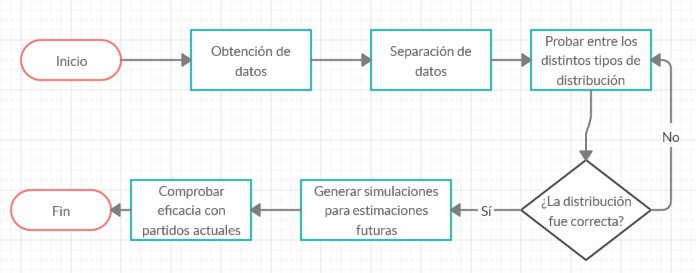


### 1.4 Nodos y variables que se decidieron simular y porqué
> A partir de datos obtenidos previamente, se decidió crear la distribución adecuada. Después, se tratará de separar los datos en partidos en casa, visitante, así como contra la posición del equipo contra el que se juega en la tabla, esto con el fin de crear variables con mayor independencia entre sí. Se simularán estos escenarios para estimar resultados de partidos.

### 1.5 Definición de hipótesis y supuestos.
> Para facilitar el modelado del proceso, se crean supuestos considerados verdaderos a lo largo del proceso. Por lo tanto, se decidió utilizar los siguientes supuestos:
1. Los datos visitante y local son independientes.
2. El equipo siempre es el mismo. Es decir, se consideran los datos del equipo como uno y no de los jugadores como individuos.
3. Nigún cambio en la formación interna tanto del club como institución como del equipo y cuerpo técnico mismo hace que se considere como un "equipo diferente". Es decir, el "nombre" del club es la representación de los datos.
4. A pesar de que todos los resultados son de futbol y partidos, los datos seguirán distribuciones distintas dependiendo del equipo.

### 1.6 Obtención de bases de datos
> Las bases de datos de los partidos se consiguen normalmente a través de compañías especializadas en datos deportivos para distintos usos. La recomendción que nos hicieron fue Sofascore www.sofascore.com. Al entrar pudimos observar que tiene toda la información necesaria para nostros, sobre todo considerando que nuestro enfoque es la liga doméstica, es decir la Liga MX. Entonces nuestra primera opción es esa.

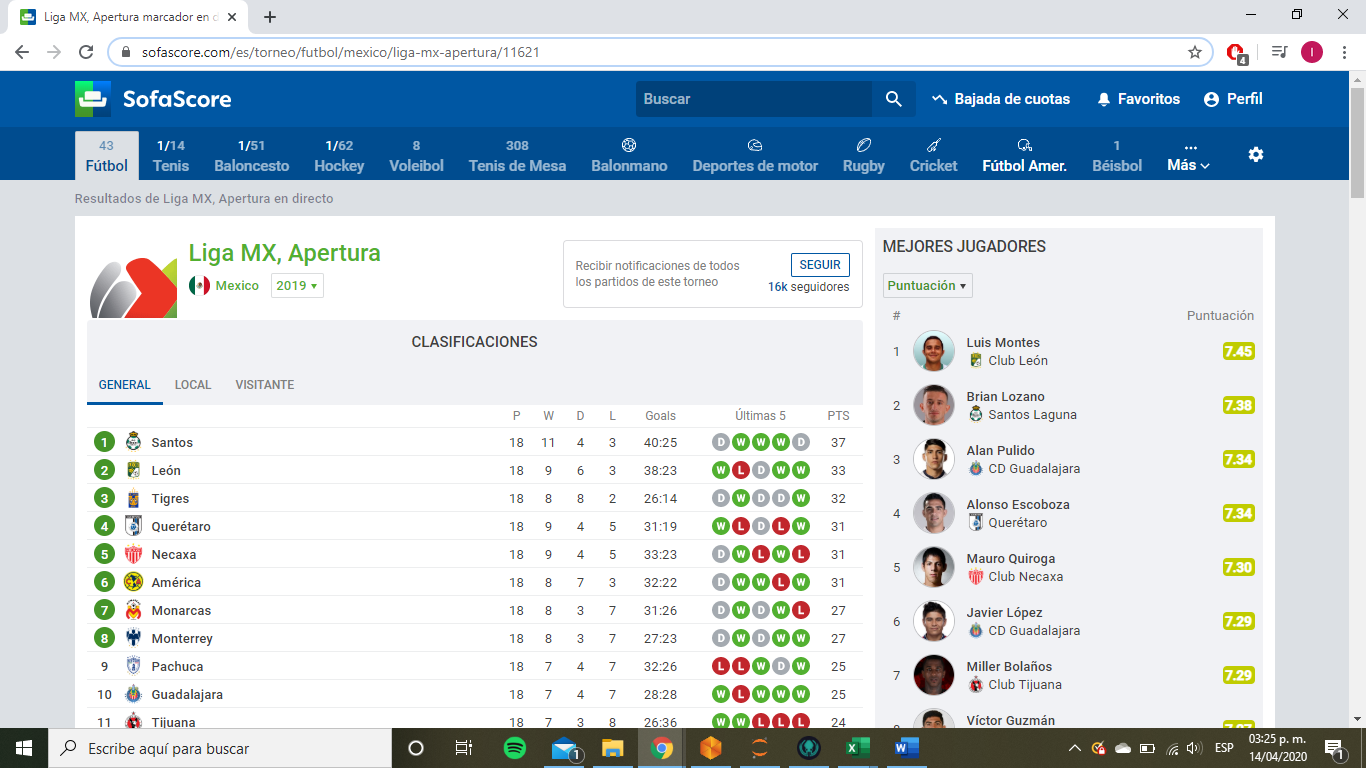

> En cuanto a la institución que vamos a simular es bastante sencillo, es la primera división del futbol profesional en México, es decir, la Liga MX (antes Primera División). Esta institución fundada en 1922 está a punto de cumplir cien años y está afiliada a la máxima autoridad del mundo del futbol, la FIFA.

> Sofascore es una empresa con más de 10 años de actividad, enfocada en satisfacer las necesidades de datos que las televisoras y los televidentes reclaman. Conforme pasó el tiempo y fue avanzando la tecnología, fueron incorporando más sectores de clientes gracias a que fueron añadiendo datos de más y más ligas.

> Un ejemplo de las variables que necesitamos es la cantidad de tiros al arco en determinado tiempo vs la cantidad de goles anotados en ese mismo periodo. Esto con el fin de ir construyendo nuestra simulación de goles esperados por equipo.


In [33]:
# Importamos paquetes
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import KernelDensity
from scipy import optimize
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

In [4]:
from scipy.stats import alpha,  anglit,  arcsine,  beta,  betaprime,  bradford,  burr,  cauchy,  chi,  chi2,  cosine,  dgamma,  dweibull,  erlang,  expon,  exponnorm,  exponweib,  exponpow,  f,  fatiguelife,  fisk,  foldcauchy,  foldnorm,  frechet_r,  frechet_l,  genlogistic,  genpareto,  gennorm,  genexpon,  genextreme,  gausshyper,  gamma,  gengamma,  genhalflogistic,  gilbrat,  gompertz,  gumbel_r,  gumbel_l,  halfcauchy,  halflogistic,  halfnorm,  halfgennorm,  hypsecant,  invgamma,  invgauss,  invweibull,  johnsonsb,  johnsonsu,  ksone,  kstwobign,  laplace,  levy,  levy_l,  levy_stable,  logistic,  loggamma,  loglaplace,  lognorm,  lomax,  maxwell,  mielke,  nakagami,  ncx2,  ncf,  nct,  norm,  pareto,  pearson3,  powerlaw,  powerlognorm,  powernorm,  rdist,  reciprocal,  rayleigh,  rice,  recipinvgauss,  semicircular,  t,  triang,  truncexpon,  truncnorm,  tukeylambda,  uniform,  vonmises,  vonmises_line,  wald,  weibull_min,  weibull_max,  wrapcauchy

In [5]:
def replace_text(x,to_replace,replacement):
    try:
        x=x.replace(to_replace,replacement)
    except:
        pass
    return x

In [13]:
dat = pd.read_csv('DataSet_LigaMXcsv.csv')
dat = dat.fillna(0)
dat = dat.apply(replace_text,args= ('#¡DIV/0!',0))
dat = dat.apply(replace_text,args= ('Cruz Azul','Cruz_Azul'))
dat = dat.apply(replace_text,args= ('FC Juarez','FC_Juarez'))
dat = dat.apply(replace_text,args= ('Atetico de San Luis','Atletico_de_San_Luis'))
dat = dat.apply(replace_text,args= ('Santos Laguna','Santos_Laguna'))
dat = dat.apply(replace_text,args= ('Tigres UANL','Tigres_UANL'))
dat = dat.apply(replace_text,args= ('Club Tijuana','Club_Tijuana'))
dat = dat.apply(replace_text,args= ('Club Leon','Club_Leon'))
dat = dat.apply(replace_text,args= ('Pumas UNAM','Pumas_UNAM'))
del dat['Ratio_GolxTiro']
dat['Ratio_GolxTiroAGol']=dat['Ratio_GolxTiroAGol'].astype(float)
dat

,Equipo,Tiros,A_Gol,Goles,Ratio_TiroAGolxTiro,Ratio_GolxTiroAGol
0,America,14,4,2,0.285714,0.500000
1,America,14,4,2,0.285714,0.500000
2,America,11,6,3,0.545455,0.500000
3,America,14,7,2,0.500000,0.285714
4,America,17,9,2,0.529412,0.222222
5,America,13,9,3,0.692308,0.333333
6,America,22,5,0,0.227273,0.000000
7,America,12,3,0,0.250000,0.000000
8,America,16,6,3,0.375000,0.500000
9,America,16,8,5,0.500000,0.625000


In [14]:
ratios=['Tiros','Ratio_TiroAGolxTiro','Ratio_GolxTiroAGol']
equipos = np.array((dat['Equipo']).unique())
ratios[0], equipos

('Tiros', array(['America', 'Atlas', 'Cruz_Azul', 'Chivas', 'Club_Leon',
        'FC_Juarez', 'Atletico_de_San_Luis', 'Santos_Laguna',
        'Tigres_UANL', 'Club_Tijuana', 'Toluca', 'Pumas_UNAM', 'Monterrey',
        'Morelia', 'Necaxa', 'Pachuca', 'Puebla', 'Queretaro'],
       dtype=object))

In [15]:
equipoyratio=[]
for i in equipos:
    for j in range(3):
        globals()['%s'%i+ratios[j]]=dat.loc[dat['Equipo'] == i][ratios[j]]
        equipoyratio.append(['%s' %i+ratios[j]])
        print(['%s'%i+ratios[j]])

['AmericaTiros']
['AmericaRatio_TiroAGolxTiro']
['AmericaRatio_GolxTiroAGol']
['AtlasTiros']
['AtlasRatio_TiroAGolxTiro']
['AtlasRatio_GolxTiroAGol']
['Cruz_AzulTiros']
['Cruz_AzulRatio_TiroAGolxTiro']
['Cruz_AzulRatio_GolxTiroAGol']
['ChivasTiros']
['ChivasRatio_TiroAGolxTiro']
['ChivasRatio_GolxTiroAGol']
['Club_LeonTiros']
['Club_LeonRatio_TiroAGolxTiro']
['Club_LeonRatio_GolxTiroAGol']
['FC_JuarezTiros']
['FC_JuarezRatio_TiroAGolxTiro']
['FC_JuarezRatio_GolxTiroAGol']
['Atletico_de_San_LuisTiros']
['Atletico_de_San_LuisRatio_TiroAGolxTiro']
['Atletico_de_San_LuisRatio_GolxTiroAGol']
['Santos_LagunaTiros']
['Santos_LagunaRatio_TiroAGolxTiro']
['Santos_LagunaRatio_GolxTiroAGol']
['Tigres_UANLTiros']
['Tigres_UANLRatio_TiroAGolxTiro']
['Tigres_UANLRatio_GolxTiroAGol']
['Club_TijuanaTiros']
['Club_TijuanaRatio_TiroAGolxTiro']
['Club_TijuanaRatio_GolxTiroAGol']
['TolucaTiros']
['TolucaRatio_TiroAGolxTiro']
['TolucaRatio_GolxTiroAGol']
['Pumas_UNAMTiros']
['Pumas_UNAMRatio_TiroAGolxTiro'

C:\Users\ivanp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ivanp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frecuencia')

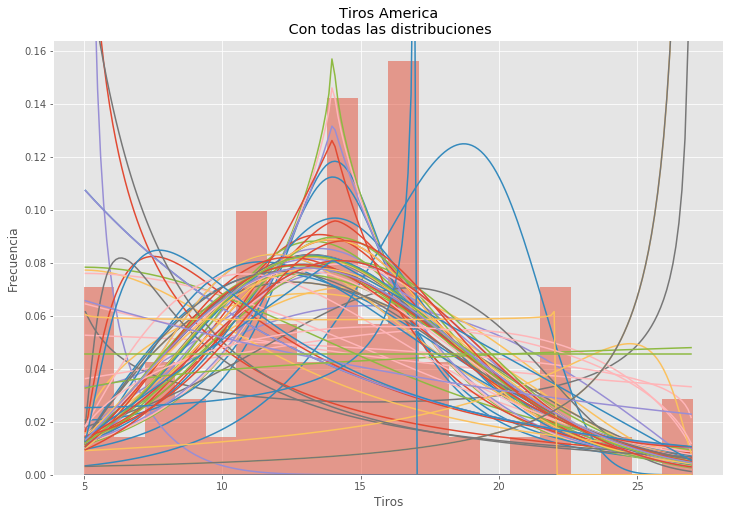

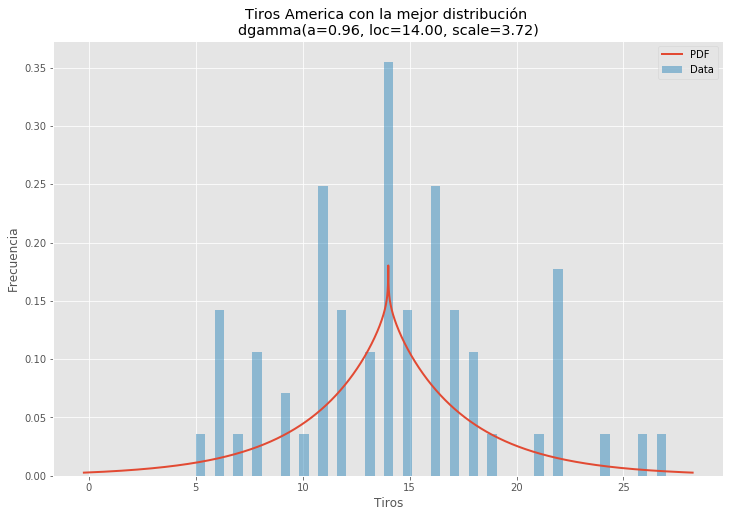

In [17]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

#    DISTRIBUTIONS = [st.alpha, st.beta, st.chi,st.chi2, st.gamma, st.norm, st.logistic,st.loggamma,
#                    st.loglaplace,st.lognorm, st.t, st.triang]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pd.Series(x)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=20, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Tiros America\n Con todas las distribuciones')
ax.set_xlabel(u'Tiros')
ax.set_ylabel('Frecuencia')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Tiros America con la mejor distribución \n' + dist_str)
ax.set_xlabel(u'Tiros')
ax.set_ylabel('Frecuencia')

# Nodo 1
Tiros a gol por tiro

In [49]:
N=10000
c = AmericaTiros
pruebadist=best_fit_distribution(c)
pruebadist

('dgamma', (0.9593340040347285, 13.999999999999996, 3.7233271462235837))

(array([2.000e+00, 4.000e+00, 4.900e+01, 3.950e+02, 3.201e+03, 5.589e+03,
        6.640e+02, 8.200e+01, 1.300e+01, 1.000e+00]),
 array([-25.60777093, -17.88408861, -10.16040628,  -2.43672395,
          5.28695838,  13.01064071,  20.73432303,  28.45800536,
         36.18168769,  43.90537002,  51.62905235]),
 <a list of 10 Patch objects>)

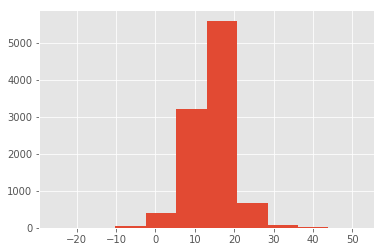

In [50]:
vp_AmericaTiros=dgamma.rvs(0.9593340040347285,13.999999999999996,3.7233271462235837, size = N)
plt.hist(vp_AmericaTiros)

In [51]:
def simuladortiros(Vector:'Vector donde están las muestras', CantMuestras: 'Lenght del vector'):
    aleatorio= np.random.randint(CantMuestras)
    Tiros= Vector[aleatorio]
    return Tiros
def mediatiros(Vector:'Vector donde están las muestras', CantMuestras: 'Lenght del vector',
               N: 'Numero de simulaciones'):
    MCTiros= [simuladortiros(Vector, CantMuestras) for i in range(N)]
    MeanMCTiros= np.mean(MCTiros)
    return MeanMCTiros

In [52]:
mediatiros(vp_AmericaTiros,N,N)

14.069939106038166

# Nodo 2
Goles por tiro a gol

In [53]:
c2 = AmericaRatio_TiroAGolxTiro
pruebadist2=best_fit_distribution(c2)
pruebadist2

('gennorm', (2.6004207825491794, 0.3631886000679924, 0.21764547903633996))

(array([  45.,  296., 1015., 1831., 2260., 2180., 1540.,  672.,  145.,
          16.]),
 array([-0.05596184,  0.03163408,  0.11923   ,  0.20682592,  0.29442184,
         0.38201776,  0.46961368,  0.5572096 ,  0.64480552,  0.73240144,
         0.81999736]),
 <a list of 10 Patch objects>)

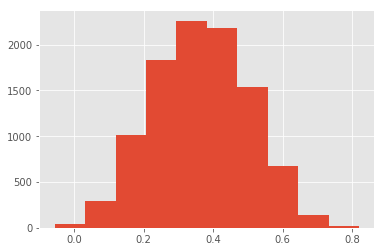

In [54]:
vp_AmericaTiroAGolxTiro=gennorm.rvs(2.6004207825491794,0.3631886000679924,0.21764547903633996, size = N)
plt.hist(vp_AmericaTiroAGolxTiro)

In [55]:
def simuladorTaGol(Vector:'Vector donde están las muestras', CantMuestras: 'Lenght del vector'):
    aleatorio= np.random.randint(CantMuestras)
    TirosaGol= Vector[aleatorio]
    return TirosaGol
def mediaTaGol(Vector:'Vector donde están las muestras', CantMuestras: 'Lenght del vector',
               N: 'Numero de simulaciones'):
    MCTirosaGol= [simuladorTaGol(Vector, CantMuestras) for i in range(N)]
    MeanMCTirosaGol= np.mean(MCTirosaGol)
    return MeanMCTirosaGol

In [56]:
mediaTaGol(vp_AmericaTiroAGolxTiro,N,N)

0.3647812583436128

# Nodo 3
Goles por tiro a gol

In [59]:
c3 = AmericaRatio_GolxTiroAGol
pruebadist3=best_fit_distribution(c3)
pruebadist3

('mielke',
 (0.35270227080393735,
  2.287948057516206,
  -6.2273130200536424e-30,
  0.5098620373150532))

(array([9.639e+03, 2.790e+02, 4.600e+01, 1.800e+01, 8.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([7.75234831e-14, 8.75938844e-01, 1.75187769e+00, 2.62781653e+00,
        3.50375538e+00, 4.37969422e+00, 5.25563307e+00, 6.13157191e+00,
        7.00751075e+00, 7.88344960e+00, 8.75938844e+00]),
 <a list of 10 Patch objects>)

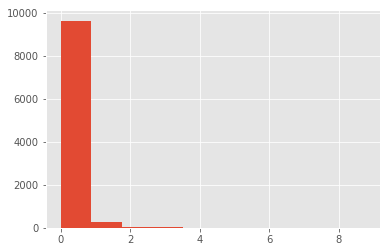

In [60]:
vp_AmericaGolxTiroAGol=mielke.rvs(0.35270227080393735,2.287948057516206,-6.2273130200536424e-30,0.5098620373150532, size = N)
plt.hist(vp_AmericaGolxTiroAGol)

In [61]:
def simuladorGol(Vector:'Vector donde están las muestras', CantMuestras: 'Lenght del vector'):
    aleatorio= np.random.randint(CantMuestras)
    Goles= Vector[aleatorio]
    return Goles
def mediaGol(Vector:'Vector donde están las muestras', CantMuestras: 'Lenght del vector',
               N: 'Numero de simulaciones'):
    MCGol= [simuladorGol(Vector, CantMuestras) for i in range(N)]
    MeanMCGol= np.mean(MCGol)
    return MeanMCGol

In [62]:
mediaGol(vp_AmericaGolxTiroAGol,N,N)

0.19761998023121136

# Nodo 4
Goles

In [63]:
def Goles(VectorTiros:'Vector de tiros', VectorAGol: 'Vector Probabilidad Tiros a Gol', 
          VectorGol: 'Vector probabilidad de gol', CantMuestras:'Cantidad de Muestras (deben ser iguales)',
          N: 'Número de simulaciones'):
    Goles= mediatiros(VectorTiros, CantMuestras, N)*mediaTaGol(VectorAGol, CantMuestras, N)*mediaGol(VectorGol, CantMuestras, N)
    return Goles

In [64]:
Goles(vp_AmericaTiros,vp_AmericaTiroAGolxTiro,vp_AmericaGolxTiroAGol,N,N)

0.9290544652081649

In [65]:
dist='dist'
distribuciones=[]
for i in equipos:
    for j in range(3):
        x=np.array(dat.loc[dat['Equipo'] == i][ratios[j]])
        globals()['%s'%dist+i+ratios[j]]=best_fit_distribution(x)
        distribuciones.append(globals()['%s'%dist+i+ratios[j]])
        print(globals()['%s'%dist+i+ratios[j]])

('dgamma', (0.9593340040347285, 13.999999999999996, 3.7233271462235837))
('gennorm', (2.6004207825491794, 0.3631886000679924, 0.21764547903633996))
('mielke', (0.35270227080393735, 2.287948057516206, -6.2273130200536424e-30, 0.5098620373150532))
('dgamma', (1.4547943299098751, 11.479601326743298, 2.537191804827293))
('dgamma', (1.4762833488598681, 0.3411138991521144, 0.06959689539777714))
('beta', (0.1824985247445866, 8.983422421425335, -1.1431319290232874e-32, 3.2720094032391405))
('dgamma', (0.9669437035046345, 13.999999999999996, 3.269151633930578))
('loglaplace', (2.937581226895544, 0.007562345312658323, 0.32577098692674167))
('exponpow', (0.3946234628493236, -1.2906049328740875e-27, 0.6109681671467508))
('powerlaw', (0.5077292805354667, 3.999999999999999, 22.62784586321053))
('dweibull', (1.5105719437234721, 0.38198181768018513, 0.1247346252564013))
('erlang', (0.15964519163793023, -4.2975581276667255e-27, 0.2589013778530531))
('laplace', (13.00000039914274, 4.089256582492997))
('

In [66]:
vectores=[]
v='v'
for i in range(len(distribuciones)):
    a = distribuciones[i][0]
    b = distribuciones[i][1]
    if len(b)==1:
        globals()['v_%i'%i]= eval(a).rvs(b[0], size = N)
    elif len(b)==2:
        globals()['v_%i'%i]= eval(a).rvs(b[0],b[1], size = N)
    elif len(b)==3:
        globals()['v_%i'%i]= eval(a).rvs(b[0],b[1],b[2], size = N)
    elif len(b)==4:
        globals()['v_%i'%i]= eval(a).rvs(b[0],b[1],b[2],b[3], size = N)
    elif len(b)==5:
        globals()['v_%i'%i]= eval(a).rvs(b[0],b[1],b[2],b[3],b[4], size = N)
    elif len(b)==6:
        globals()['v_%i'%i]= eval(a).rvs(b[0],b[1],b[2],b[3],b[4],b[5], size = N)
    elif len(b)==7:
        globals()['v_%i'%i]= eval(a).rvs(b[0],b[1],b[2],b[3],b[4],b[5],b[6], size = N)
    print(['v_%i'%i])
    vectores.append('v_%i'%i)

['v_0']
['v_1']
['v_2']
['v_3']
['v_4']
['v_5']
['v_6']
['v_7']
['v_8']
['v_9']
['v_10']
['v_11']
['v_12']
['v_13']
['v_14']
['v_15']
['v_16']
['v_17']
['v_18']
['v_19']
['v_20']
['v_21']
['v_22']
['v_23']
['v_24']
['v_25']
['v_26']


C:\Users\ivanp\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.15964519).
  RuntimeWarning)
C:\Users\ivanp\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.26212701).
  RuntimeWarning)


['v_27']
['v_28']
['v_29']
['v_30']
['v_31']
['v_32']
['v_33']
['v_34']
['v_35']
['v_36']
['v_37']
['v_38']
['v_39']
['v_40']
['v_41']
['v_42']
['v_43']
['v_44']
['v_45']
['v_46']
['v_47']
['v_48']
['v_49']
['v_50']
['v_51']
['v_52']
['v_53']


In [104]:
golesequipos=[]
for i in range(len(equipos)):
    globals()['goles%s' %equipos[i]]=Goles(eval(vectores[3*i]),eval(vectores[3*i+1]),eval(vectores[3*i+2]),10000,10000)
    print('goles%s' %equipos[i],globals()['goles%s' %equipos[i]])
    golesequipos.append(globals()['goles%s' %equipos[i]])

golesAmerica 1.0592940651068845
golesAtlas 0.24668334836714378
golesCruz_Azul 1.724626024875071
golesChivas 0.1926718959106587
golesClub_Leon 2.00794184194197
golesFC_Juarez 0.8817821793436429
golesAtletico_de_San_Luis 0.07012127568146145
golesSantos_Laguna 1.4580295274067396
golesTigres_UANL 0.42737997009133
golesClub_Tijuana 1.2828733049582945
golesToluca 2.040119979834094
golesPumas_UNAM 0.5298218236174003
golesMonterrey 1.6153030962269832
golesMorelia 0.5965444770732199
golesNecaxa 2.2399059264692487
golesPachuca 0.6076337756610667
golesPuebla 1.431022765660464
golesQueretaro 0.5887043096464034


### 1.7 Visualización de resultados de simulación.

In [106]:
Resultados=pd.DataFrame(columns=['Goles Esperados'])
Resultados.index.name='Equipos'
for i in range(len(equipos)):
    globals()['goles%s' %equipos[i]]=Goles(eval(vectores[3*i]),eval(vectores[3*i+1]),eval(vectores[3*i+2]),10000,10000)
    Resultados.loc['%s'%equipos[i]]=golesequipos[i]
Resultados

,Goles Esperados
Equipos,
America,1.059294
Atlas,0.246683
Cruz_Azul,1.724626
Chivas,0.192672
Club_Leon,2.007942
FC_Juarez,0.881782
Atletico_de_San_Luis,0.070121
Santos_Laguna,1.458030
Tigres_UANL,0.427380


### 1.8 Conclusiones.
> En conclusión, se creó un modelo que muestra los posibles resultados de partidos de la LigaMX, donde se toman en cuenta las situaciones actuales y el contexto, en donde con los datos obtenidos, se generan estimaciones de goles, es decir, en este momento, siguiendo el comportamiendo de los equipos, sus goles esperados son los mostrados, por lo que se puede concluir que un equipo con mayor número de goles estimados, vencería a otro equipo con menor número de goles esperados. Además, se simularon los ratios de tiros a gol por tiro de cada equipo, así como sus goles por tiro a gol. Se generaron los 4 escenarios y se comparó con los partidos siguientes, de distintos encuentros entre los equipos. Por otra parte, algunas hipótesis se comprobaron mientras que otras resultaron seguir comportamientos distintos a los que esperábamos, se comprobó que algunos equipos siguen distribuciones muy diferentes a las de los demás, y se utilizaron más de cinco tipos de distribuciones distintas a pesar de que explicaban las mismas variables.

### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada..